In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# File of area stats from Jin-Si, Jan 4 2021
df = pd.read_csv("NCB_Channel_Stats_n25_pD.csv")
df2=df.describe()
df2

,OBJECTID,Shape_Area,MIN,MAX,RANGE,MEAN,STD,VOLUME,CENTROID_X,CENTROID_Y,...,Type,New_Veg_Area,Unnamed: 16,Unnamed: 17,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,...,99.000000,99.000000,0.0,8.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,66.313131,12650.904343,-0.134373,3.156482,3.290855,0.976969,0.548324,15169.682699,392274.108485,3.869254e+06,...,1.858586,1011.325556,NaN,3.576155e+05,-2.660578,62.498347,65.158924,19.343996,10.856811,300359.717450
std,32.369249,17282.964189,0.266080,1.499722,1.639506,0.362834,0.231935,21644.770094,5895.702523,5.478668e+03,...,0.979484,2697.663336,NaN,6.336890e+05,3.166895,56.353396,58.428741,18.178245,10.388972,307719.616156
min,7.000000,46.000000,-1.326000,0.564000,0.440000,0.301134,0.089796,26.074226,380367.790800,3.858401e+06,...,1.000000,0.010000,NaN,1.070000e+02,-8.025678,11.787659,12.776659,2.794601,1.709248,27352.921450
25%,40.500000,1209.000000,-0.177000,1.861411,1.866904,0.636859,0.361193,887.728174,386852.637250,3.864061e+06,...,1.000000,0.010000,NaN,6.545000e+02,-3.011000,14.387000,15.371211,3.602908,1.915244,109092.437800
50%,69.000000,6201.000000,-0.065000,3.020000,3.098301,1.000331,0.561754,5646.366969,392907.803600,3.869989e+06,...,2.000000,0.010000,NaN,2.714000e+03,-0.989000,43.330287,46.341287,13.167653,6.686872,116652.116900
75%,93.500000,16466.000000,-0.000500,4.528000,4.691500,1.275932,0.744423,22263.468630,397022.798200,3.873611e+06,...,2.000000,455.155000,NaN,3.882008e+05,-0.984211,105.868093,106.161093,35.250660,20.767337,514895.183600
max,121.000000,88843.000000,0.187000,6.367895,7.250895,1.620925,0.962666,109310.830600,401474.468400,3.877848e+06,...,5.000000,12620.240000,NaN,1.501799e+06,-0.293000,137.118694,145.144372,41.904157,23.205355,733805.927500


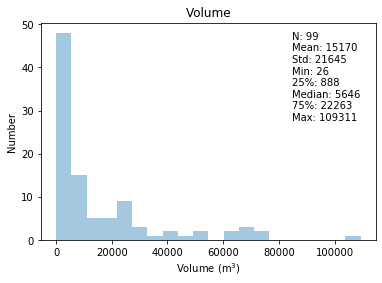

In [3]:
#TODO: With a little work, these could all be plotted on same figure
colname = 'VOLUME'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Volume')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Volume (m$^3$)')
plt.savefig('Hist_volume.svg',dpi=200,bbox='tight')

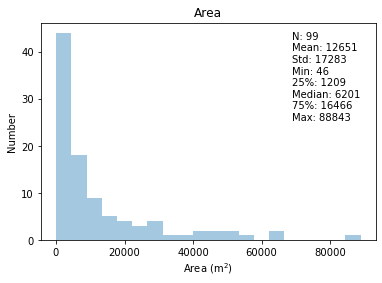

In [4]:
colname = 'Shape_Area'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Area')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Area (m$^2$)')
plt.savefig('Hist_area.svg',dpi=200,bbox='tight')

C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


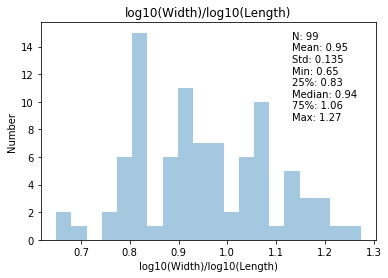

In [5]:

data = np.log10(df['Width'].values)/np.log10(df['Length'])
count = np.shape(data)[0]
mean = np.mean(data)
std = np.std(data)
pct = np.nanpercentile(data,[25,50,75])
mind = np.min(data)
maxd = np.max(data)

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('log10(Width)/log10(Length)')
ts = "N: {:.0f}\nMean: {:.2f}\nStd: {:.3f}\nMin: {:.2f}\n25%: {:.2f}\nMedian: {:.2f}\n75%: {:.2f}\nMax: {:.2f}".format(\
    count,mean,std,\
    mind,pct[0],pct[1],pct[2],maxd)
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('log10(Width)/log10(Length)')
plt.savefig('Hist_width_length.svg',dpi=200,bbox='tight')

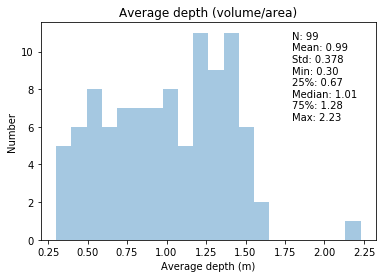

In [6]:
data = df['VOLUME'].values/df['Shape_Area']
count = np.shape(data)[0]
mean = np.mean(data)
std = np.std(data)
pct = np.percentile(data,[25,50,75])
mind = np.min(data)
maxd = np.max(data)

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Average depth (volume/area)')
ts = "N: {:.0f}\nMean: {:.2f}\nStd: {:.3f}\nMin: {:.2f}\n25%: {:.2f}\nMedian: {:.2f}\n75%: {:.2f}\nMax: {:.2f}".format(\
    count,mean,std,\
    mind,pct[0],pct[1],pct[2],maxd)
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Average depth (m)')
plt.savefig('Hist_avg_depth.svg',dpi=200,bbox='tight')

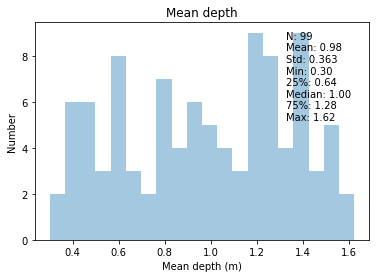

In [7]:
colname = 'MEAN'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Mean depth')
ts = "N: {:.0f}\nMean: {:.2f}\nStd: {:.3f}\nMin: {:.2f}\n25%: {:.2f}\nMedian: {:.2f}\n75%: {:.2f}\nMax: {:.2f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Mean depth (m)')
plt.savefig('Hist_mean_depth.svg',dpi=200,bbox='tight')

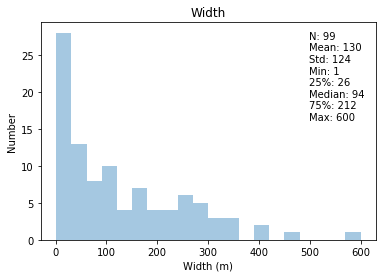

In [11]:
colname = 'Width'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Width')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.8, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Width (m)')
plt.savefig('Hist_width.svg',dpi=200,bbox='tight')

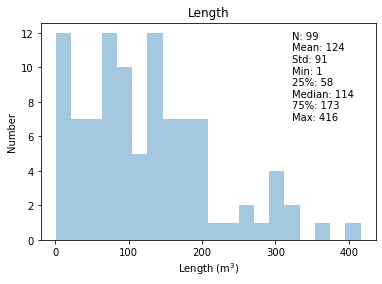

In [9]:
colname = 'Length'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Length')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Length (m$^3$)')
plt.savefig('Hist_length.svg',dpi=200,bbox='tight')

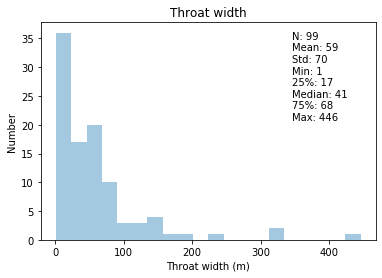

In [10]:
colname = 'Throat'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Throat width')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Throat width (m)')
plt.savefig('Hist_throat.svg',dpi=200,bbox='tight')